In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from env import get_connection
from acquire import wrangle_zillow
from wrangle_zillow import handle_missing_values
from wrangle_zillow import missing_nulls

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
pd.options.display.max_rows = 999
import scipy.stats as stats

In [2]:
zillow=wrangle_zillow()

/Users/andy.jensen/codeup-data-science/clustering-exercises/acquire.py:14: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('zillow.csv')


In [3]:
z=missing_nulls(zillow)

In [4]:
z.sort_values('pct_rows_missing', ascending= False)

,num_rows_missing,pct_rows_missing
buildingclassdesc,77564,0.999807
buildingclasstypeid,77564,0.999807
finishedsquarefeet13,77537,0.999459
storytypeid,77529,0.999355
storydesc,77529,0.999355
basementsqft,77529,0.999355
yardbuildingsqft26,77509,0.999098
fireplaceflag,77407,0.997783
architecturalstyletypeid,77372,0.997332
architecturalstyledesc,77372,0.997332


In [5]:
zillow.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [6]:
zillow=handle_missing_values(zillow,.6,.7)

In [7]:
zillow.shape

(77503, 35)

# Questions for the Zillow data with 'logerror' as the target
1. Which property land use has the highest average logerror?
    * Histogram
    * one sample ttest or two tail
2. How is lotsize square feet correlated to logerror?
    * scatter
    * pearsonsr or spearmans
3.  Is there a region id zip with an average higher logerror?
    * histogram
    * two sample/ind
4. Is there a month of transaction date that has a higher or lower than average logerror?
    * histogram
    * one sample ttest
5. Is there a Tax value dollar count range with a higher or lower logerror than average?
    * scatter
    * one sample ttest

In [8]:
zillow=zillow.dropna()

In [9]:
zillow.head()

,parcelid,propertylandusetypeid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
3,12177905,261.0,2.0,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
4,10887214,266.0,2.0,1970746,3.0,3.0,8.0,3.0,1312.0,1312.0,...,119407.0,2016.0,45726.0,1533.89,6.037124e+13,4,0.006940,2017-01-01,Central,Condominium
6,12095076,261.0,2.0,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Central,Single Family Residential
8,12790562,261.0,2.0,1246926,3.0,4.0,9.0,3.0,3039.0,3039.0,...,220583.0,2016.0,43056.0,3104.19,6.037500e+13,8,-0.040966,2017-01-02,Central,Single Family Residential
9,11542646,266.0,2.0,1585097,3.0,2.0,8.0,3.0,1290.0,1290.0,...,371361.0,2016.0,220058.0,4557.32,6.037275e+13,9,-0.036763,2017-01-02,Central,Condominium


In [10]:
zillow=zillow.drop(columns='id.1')

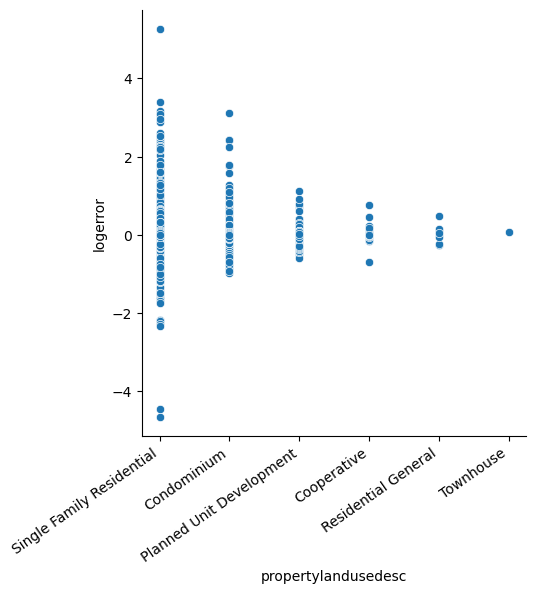

In [11]:
sns.relplot(x='propertylandusedesc', y='logerror', data=zillow)
plt.xticks(rotation=35, ha='right')
plt.show()

In [12]:
zillow['propertylandusedesc'].value_counts()

Single Family Residential    32126
Condominium                   9992
Planned Unit Development      1737
Cooperative                     29
Residential General              9
Townhouse                        1
Name: propertylandusedesc, dtype: int64

In [13]:
print(zillow[zillow['propertylandusedesc']=='Single Family Residential'].logerror.mean())
print(zillow[zillow['propertylandusedesc']=='Condominium'].logerror.mean())
print(zillow[zillow['propertylandusedesc']=='Planned Unit Development'].logerror.mean())
print(zillow[zillow['propertylandusedesc']=='Cooperative'].logerror.mean())
print(zillow[zillow['propertylandusedesc']=='Residential General'].logerror.mean())
print(zillow[zillow['propertylandusedesc']=='Townhouse'].logerror.mean())

0.014798484236939146
0.013402131681928622
0.008449028033985517
0.0379376933773186
0.03375120115887778
0.0795296587581999


In [14]:
tmean=zillow[zillow['propertylandusedesc']=='Townhouse'].logerror.mean()
totmean=zillow['logerror'].mean()
t, p=stats.ttest_1samp(tmean, totmean)

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_18003/4030716838.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p=stats.ttest_1samp(tmean, totmean)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [15]:
print(t,p)

nan nan


### results were too close together. Safe to say they were not significantlly different

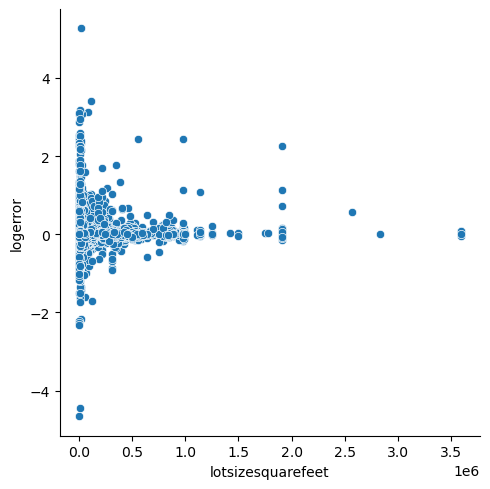

In [16]:
sns.relplot(x='lotsizesquarefeet', y='logerror', data=zillow)
plt.show()

In [17]:
s, p=stats.spearmanr(zillow['lotsizesquarefeet'], zillow['logerror'])
print(s,p)

0.022131973889127424 3.530197687815658e-06


### there is a significant correlation

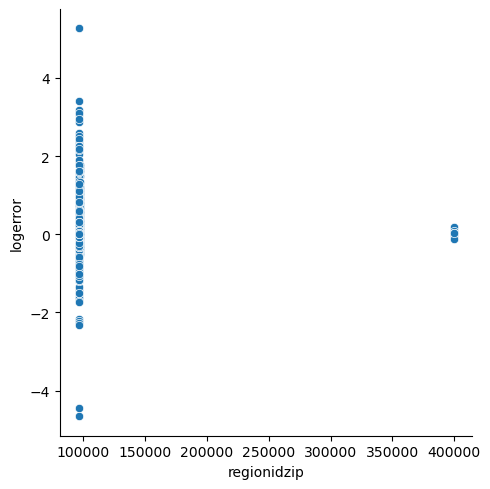

In [22]:
sns.relplot(x='regionidzip',y='logerror', data=zillow)
plt.show()

In [23]:
zillow['regionidzip'].value_counts()

97319.0     784
97318.0     672
97329.0     571
97328.0     565
96193.0     459
96368.0     428
96505.0     404
96378.0     385
96389.0     382
96364.0     373
96370.0     373
96401.0     370
97330.0     356
97317.0     353
96030.0     352
96122.0     345
96242.0     322
96190.0     319
96349.0     314
96050.0     303
96369.0     301
96489.0     297
96124.0     293
96379.0     292
96346.0     292
96247.0     291
96117.0     290
96023.0     289
96361.0     285
96027.0     284
96374.0     284
96339.0     281
96387.0     278
96352.0     278
96449.0     278
96237.0     276
96488.0     274
96464.0     268
96469.0     266
96424.0     265
96356.0     263
96341.0     263
96212.0     263
96123.0     259
96239.0     258
96412.0     256
96513.0     254
96236.0     253
96415.0     252
96522.0     251
96222.0     248
96049.0     246
96506.0     246
96047.0     244
96121.0     242
96120.0     241
96208.0     239
96197.0     238
96213.0     238
96336.0     236
96265.0     235
96163.0     234
96107.0 

In [28]:
lower=zillow[zillow['regionidzip']<96424].logerror.mean()
upper=zillow[zillow['regionidzip']>=96424].logerror.mean()
t, p=stats.ttest_ind(lower, upper)
print(t, p)

nan nan


/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_18003/1378605931.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p=stats.ttest_ind(lower, upper)


### they were too close similar to property land use desc. there is not a significant difference

In [29]:
zillow['transactiondate'].value_counts()

2017-06-30    692
2017-04-28    542
2017-05-31    508
2017-07-28    494
2017-03-31    468
2017-08-31    435
2017-05-26    430
2017-08-25    413
2017-09-01    409
2017-06-23    407
2017-06-16    405
2017-06-01    389
2017-03-28    386
2017-08-11    386
2017-07-07    384
2017-09-08    367
2017-07-14    358
2017-05-12    357
2017-05-05    354
2017-06-29    345
2017-08-18    341
2017-06-02    340
2017-04-14    339
2017-03-24    335
2017-08-30    334
2017-05-19    322
2017-03-17    321
2017-06-09    319
2017-02-28    313
2017-08-29    312
2017-07-21    311
2017-09-15    310
2017-04-21    308
2017-04-07    308
2017-05-25    302
2017-06-14    298
2017-03-30    298
2017-06-27    297
2017-06-15    295
2017-06-28    294
2017-09-06    289
2017-08-15    288
2017-08-22    287
2017-06-21    287
2017-05-23    285
2017-06-22    282
2017-07-26    282
2017-05-17    277
2017-07-25    274
2017-07-18    274
2017-07-31    272
2017-08-08    271
2017-03-29    269
2017-01-31    269
2017-07-11    269
2017-06-06

In [32]:
jan=zillow[zillow['transactiondate'].str.startswith('2017-01')]
feb=zillow[zillow['transactiondate'].str.startswith('2017-02')]
mar=zillow[zillow['transactiondate'].str.startswith('2017-03')]
apr=zillow[zillow['transactiondate'].str.startswith('2017-04')]
may=zillow[zillow['transactiondate'].str.startswith('2017-05')]
jun=zillow[zillow['transactiondate'].str.startswith('2017-06')]
jul=zillow[zillow['transactiondate'].str.startswith('2017-07')]
aug=zillow[zillow['transactiondate'].str.startswith('2017-08')]
sep=zillow[zillow['transactiondate'].str.startswith('2017-09')]
octo=zillow[zillow['transactiondate'].str.startswith('2017-10')]
nov=zillow[zillow['transactiondate'].str.startswith('2017-11')]
dec=zillow[zillow['transactiondate'].str.startswith('2017-12')]


In [33]:
print(jan.logerror.mean())
print(feb.logerror.mean())
print(mar.logerror.mean())
print(apr.logerror.mean())
print(may.logerror.mean())
print(jun.logerror.mean())
print(jul.logerror.mean())
print(aug.logerror.mean())
print(sep.logerror.mean())
print(octo.logerror.mean())
print(nov.logerror.mean())
print(dec.logerror.mean())

0.023578654159713375
0.022105027880740598
0.013061455711781004
0.010854731546743247
0.007508059382210116
0.011844913312256403
0.01064834522958668
0.016896028535511958
0.019803128007652156
nan
nan
nan


In [34]:
janmean=jan.logerror.mean()

t,p= stats.ttest_1samp(janmean, totmean)
print(t,p)

nan nan


/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_18003/3333104854.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t,p= stats.ttest_1samp(janmean, totmean)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


### no statistical significance between january logerror mean and the total mean

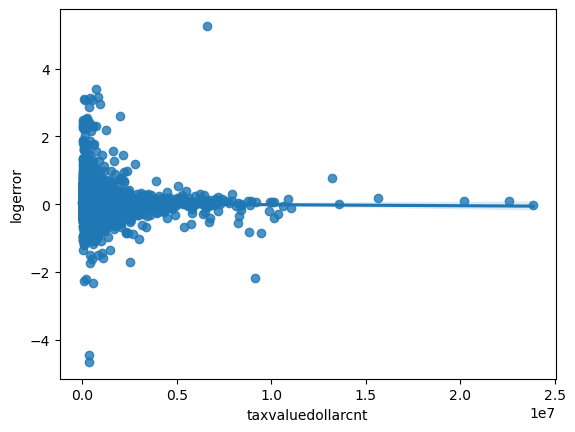

In [36]:
sns.regplot(x='taxvaluedollarcnt', y='logerror', data=zillow)
plt.show()

In [37]:
zillow['taxvaluedollarcnt'].mean()

454184.17551373766

In [38]:
lower=zillow[zillow['taxvaluedollarcnt']<=454184].logerror.mean()
upper=zillow[zillow['taxvaluedollarcnt']>454184].logerror.mean()
t, p=stats.ttest_ind(lower, upper)
print(t,p)

nan nan


/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_18003/939220487.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p=stats.ttest_ind(lower, upper)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [39]:
upper

0.01041911326144733

In [40]:
lower

0.01598506910984466

### the logerror is too similar. there is no significance between these two groups of taxvaluedollarcnt